#**STEP 1 : PERKENALAN**

**MILESTONES 2**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Optional (Regression, Classification or Clustering)**

**Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:**

* Mampu memahami konsep supervised learning
* Mampu mempersiapkan data untuk digunakan dalam model supervised learning
* Mampu mengimplementasikan supervised learning dengan data yang diberikan
* Mampu melakukan evaluasi model
* Mampu melakukan model tuning

## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Plotly merupakan library grafik open source yang dapat digunakan untuk membuat visualisasi data. Library ini dibangun di atas library JavaScript Plotly dan dapat digunakan untuk membuat visualisasi data berbasis web yang dapat ditampilkan pada jupyter notebook atau aplikasi web menggunakan dash dan dapat pula disimpan sebagai file HTML.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

## **STEP 3 : DATA LOADING**

**Formating**

In [2]:
# Memudahkan untuk bisa melihat semua kolom
pd.set_option('display.max_columns', 100)

# Set nilai random agar nilainya konstan
np.random.seed(77)

#Set untuk nilai angka dibelakang koma hanya terbaca 5 angka
pd.options.display.float_format='{:.5f}'.format

**Proses Read dataset**

In [3]:
data = pd.read_csv('Challenger_Ranked_Games.csv')

## **STEP 4 : DATA EXPLORATION**

**Data memiliki jumlah baris 26904 dan jumlah kolom 50**

In [4]:
data.shape

(26904, 50)

**Melihat isi 10 data pertama**

In [5]:
data.head(10)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.20000,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.80000,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.60000,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.80000,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.40000,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.00000,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.00000,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.80000,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.60000,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.00000,227,7,86431,64141
5,4241394461,1567,1,1,1,0,0,1,2,0,8,1,65,23,26,18,43,59839,52221,576,66,13.20000,171,9,40925,51855,0,0,0,0,1,0,1,0,2,0,58,18,18,26,34,64242,44280,555,61,12.20000,140,3,23741,20132
6,4233222221,1686,0,0,1,0,0,0,0,0,2,0,72,26,16,31,30,70270,47107,601,65,13.00000,136,5,20503,31788,1,1,0,1,1,1,4,1,7,1,72,29,31,16,59,78424,58032,640,73,14.60000,214,5,31415,61040
7,4233113995,1588,1,1,1,1,0,1,2,1,10,2,79,39,36,20,88,102449,59163,613,71,14.20000,157,7,28612,67404,0,0,0,0,1,0,2,0,1,0,76,28,20,36,30,62134,47408,608,63,12.60000,133,5,27846,32107
8,4231100932,1618,1,1,1,1,0,1,3,1,8,1,89,57,26,25,44,77245,57940,704,71,14.20000,144,5,29726,66468,0,0,0,0,1,0,1,0,2,0,96,33,25,26,34,69840,49906,646,69,13.80000,159,6,32026,41601
9,4229230455,1126,1,0,1,0,1,0,1,0,4,0,43,20,20,11,34,56652,39014,486,57,11.40000,115,5,17630,37483,0,1,0,0,0,0,0,0,1,0,47,19,11,20,13,32999,32064,461,53,10.60000,92,3,23511,10775


**Melihat 10 data Middle**

In [6]:
26904 / 2

13452.0

In [7]:
data[13450:13460]

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
13450,4180844561,1686,0,1,1,0,1,1,1,0,5,1,56,15,36,30,51,79965,54294,526,63,12.60000,143,5,17034,39109,1,0,0,1,0,0,3,1,10,2,68,20,30,36,63,79529,59114,593,72,14.40000,165,7,35084,75112
13451,4179912862,1563,1,1,1,1,1,1,3,1,10,2,76,35,32,20,47,92466,57936,622,73,14.60000,185,7,22485,80293,0,0,0,0,0,0,0,0,2,0,81,29,20,32,28,48469,46767,607,63,12.60000,104,5,12779,21828
13452,4179782765,941,1,1,1,0,0,0,1,0,3,0,32,9,17,6,8,27535,30690,392,49,9.80000,91,3,10574,22688,0,0,0,0,1,0,1,0,0,0,27,5,6,17,6,18725,23717,329,44,8.80000,85,1,11943,8699
13453,4179712734,937,1,1,1,0,1,0,2,0,2,0,26,9,15,4,16,28923,29707,380,47,9.40000,94,4,10958,18602,0,0,0,0,0,0,0,0,0,0,27,2,4,15,9,24097,20729,264,41,8.20000,67,1,12158,0
13454,4179639249,933,1,1,1,0,1,0,2,0,2,0,27,11,12,4,19,18530,28606,367,48,9.60000,108,3,9000,27339,0,0,0,0,0,0,0,0,1,0,31,6,4,12,3,19421,23629,397,45,9.00000,87,0,6111,6255
13455,4179155179,1884,1,0,0,1,0,0,1,1,4,0,91,31,30,17,52,103384,63433,719,80,16.00000,233,7,46818,62396,0,1,1,0,1,0,3,0,1,0,76,37,17,30,28,94746,53781,750,74,14.80000,191,4,63555,39288
13456,4178908115,1837,0,1,0,0,1,0,3,0,3,0,85,36,34,38,61,93549,62595,637,74,14.80000,139,10,32128,62154,1,0,1,1,0,1,1,1,10,2,80,39,38,34,55,120083,66917,733,80,16.00000,199,8,28980,55312
13457,4178717929,1205,1,1,1,0,0,1,1,0,7,1,47,13,31,10,66,68863,41849,364,57,11.40000,92,8,22951,31091,0,0,0,0,1,0,1,0,0,0,36,9,10,31,14,39678,29736,343,49,9.80000,102,3,18195,6909
13458,4178651172,972,0,1,0,0,1,0,1,0,0,0,34,12,7,11,7,26130,24730,382,47,9.40000,76,2,6962,16218,1,0,1,0,0,0,1,0,1,0,30,13,11,7,22,34383,29675,400,51,10.20000,95,2,24868,18265
13459,4178392856,1601,1,1,1,1,1,1,3,1,9,1,65,27,27,11,46,61289,54909,638,71,14.20000,188,5,24087,71601,0,0,0,0,0,0,1,0,1,0,63,20,10,27,23,49989,40191,553,61,12.20000,128,1,15176,14045


**Melihat isi 10 data terakhir**

In [8]:
data.tail(10)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
26894,4142707376,1695,0,0,0,0,0,0,1,0,1,0,51,18,15,32,25,52220,47232,641,68,13.60000,165,2,32537,13488,1,1,1,1,1,1,3,1,7,1,67,23,32,15,58,84529,56781,629,75,15.00000,198,9,27157,53336
26895,4087132870,1828,1,0,1,0,1,1,3,0,7,1,82,54,23,24,35,74838,60024,781,74,14.80000,214,6,43116,79940,0,1,0,0,0,0,1,0,4,0,103,30,24,23,41,79836,54977,722,70,14.00000,149,5,24411,49704
26896,4034825342,2413,0,0,1,0,0,0,2,1,4,0,138,35,31,56,50,134777,76161,910,85,17.00000,236,5,34514,58418,1,1,0,1,1,1,4,2,11,2,106,48,56,31,90,157258,85153,790,90,18.00000,274,11,52167,104815
26897,4143231732,1797,0,0,0,0,0,0,1,0,4,0,75,47,33,47,61,106224,58781,613,69,13.80000,140,10,20405,43134,1,1,1,1,1,1,4,1,6,1,107,31,47,33,80,107212,67690,577,76,15.20000,194,11,29052,70107
26898,3959206670,1280,1,0,1,1,1,1,3,1,7,1,52,20,30,18,31,61984,51215,577,67,13.40000,149,9,23564,57020,0,1,0,0,0,0,0,0,0,0,44,12,18,30,28,45732,37657,490,57,11.40000,89,4,17334,16396
26899,4143231833,1468,0,1,0,0,0,0,1,0,0,0,72,20,24,28,50,99418,41437,438,60,12.00000,106,8,20122,13309,1,0,1,0,1,0,2,0,4,0,52,29,27,24,40,75531,46558,478,64,12.80000,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,5,1,37,2,29,42,36,61816,61221,346,65,13.00000,28,5,32837,44640,1,0,0,0,0,1,0,0,10,2,43,0,40,29,31,99837,70177,455,72,14.40000,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,4,0,72,29,14,20,19,51604,45013,568,63,12.60000,132,4,18131,45242,1,0,0,0,0,0,1,0,3,0,83,28,20,14,34,55214,48849,636,66,13.20000,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,5,0,91,25,32,19,66,93059,58160,640,76,15.20000,168,7,75427,60486,0,0,1,1,0,0,2,1,4,0,69,39,19,32,29,88366,52625,660,70,14.00000,168,5,25003,45455
26903,4100240254,948,1,1,1,0,0,0,1,0,4,0,35,11,10,2,19,22427,30001,399,50,10.00000,89,3,10791,24827,0,0,0,0,1,0,1,0,0,0,37,13,2,10,3,16574,20972,351,40,8.00000,56,0,7138,6808


**Melihat nama kolom pada data**

In [9]:
data.columns.values

array(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood',
       'blueFirstTower', 'blueFirstBaron', 'blueFirstDragon',
       'blueFirstInhibitor', 'blueDragonKills', 'blueBaronKills',
       'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced',
       'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist',
       'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills',
       'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills',
       'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt',
       'redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron',
       'redFirstDragon', 'redFirstInhibitor', 'redDragonKills',
       'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath',
       'redAssist', 'redChampionDamageDealt', 'redTotalGold',
       'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel',
       'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal',
       'redObjectDamag

**About This Dataset :**

**Source :** https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020

**Introduction :**
* This Data challenger Ranked 26000 Games, GrandMaster Ranked 65000 Games, Master 100000 Games
* Data include Blue team, Red team information

**Contents :**
* This data contains key information that can affect the win or loss in the game.
* League of Legends includes objects, champions, and minions.
* Objects here represent dragons, barons, messengers, towers, suppressors, and more.
* The heart of the data is the result of the match between the blue and red teams.
* Therefore, the factor analysis that affects the win or loss of the game and the methodology to predict the win or loss of the game will be the most important points in analyzing the data.

**Additional data description :**
* ward : Map lighting tools
* gold : Money to buy items
* tower : Attack turrets protecting our camp or enemy camp
* inhibitors : You can summon our team's superminions(very very powerful) by breaking the suppressor.
* dragon, baron : Objects that can receive buffs when destroyed
* Minion : Small summoners from each team who can earn gold by killing
* Level : champion level (min : LV 1 / max : LV 18)

**Predict the win or loss of the game or show a great visualization!**

**Melihat info data dan mengambil informasi tipe data dari tiap kolom**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

**Melihat nilai keseluruhan data dari masing-masing kolom**

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,26904.00000,4171927376.61597,74795062.21574,3482432973.00000,4142426680.50000,4190657018.00000,4219649939.50000,4261025558.00000
gameDuraton,26904.00000,1448.65366,422.57729,190.00000,1152.00000,1435.00000,1738.00000,3301.00000
blueWins,26904.00000,0.50007,0.50001,0.00000,0.00000,1.00000,1.00000,1.00000
blueFirstBlood,26904.00000,0.50353,0.50000,0.00000,0.00000,1.00000,1.00000,1.00000
blueFirstTower,26904.00000,0.52561,0.49935,0.00000,0.00000,1.00000,1.00000,1.00000
blueFirstBaron,26904.00000,0.24409,0.42955,0.00000,0.00000,0.00000,0.00000,1.00000
blueFirstDragon,26904.00000,0.40633,0.49116,0.00000,0.00000,0.00000,1.00000,1.00000
blueFirstInhibitor,26904.00000,0.36712,0.48203,0.00000,0.00000,0.00000,1.00000,1.00000
blueDragonKills,26904.00000,1.38972,1.24739,0.00000,0.00000,1.00000,2.00000,7.00000
blueBaronKills,26904.00000,0.30702,0.53714,0.00000,0.00000,0.00000,1.00000,4.00000


## **STEP 5 : DATA CLEANING**

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [12]:
dtc = data.copy()

**Melihat jumlah data yang missing values pada semua kolom**

In [13]:
dtc.isna().sum()

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

**Tidak ada data yang missing values**

In [14]:
dtc.isnull().sum().any()

False

**Mengubah nama kolom**

In [15]:
dtc.rename(columns = {'gameId':'gameID', 'gameDuraton':'gameDuration'}, inplace = True)

**Melihat apakah ada data yang duplicate**

In [16]:
dtc.duplicated().any()

True

**Melihat berapa jumlah data yang duplicate**

In [17]:
dtc.duplicated().sum()

56

**Memperlihatkan semua raw yang diduplikasi**

In [18]:
dtc[dtc.duplicated()]

,gameID,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
18833,4209512376,1797,1,0,0,0,0,0,0,0,4,2,0,0,86,82,186,278383,98237,420,90,18.00000,0,22,77621,8066,0,1,1,0,0,1,0,0,4,2,0,0,82,86,176,295811,96786,397,90,18.00000,0,19,84248,6681
18879,4211610502,820,1,1,0,0,0,1,0,0,4,2,0,0,47,21,123,79069,49319,153,73,14.60000,0,15,13115,6980,0,0,1,0,0,0,0,0,1,0,0,0,21,47,50,50763,41824,124,63,12.60000,0,4,7979,2916
19034,4212662305,1477,0,0,0,0,0,0,0,0,1,0,0,0,57,56,129,172253,74693,330,90,18.00000,0,16,50846,2708,1,1,1,0,0,1,0,0,4,3,0,0,55,57,119,195940,77042,279,90,18.00000,0,11,41788,9107
19063,4236255907,1812,1,1,0,1,1,1,3,1,7,1,56,18,36,24,52,84876,60180,614,79,15.80000,206,7,27274,48513,0,0,1,0,0,0,1,0,4,0,54,23,24,36,29,78332,54870,696,72,14.40000,153,5,18332,52727
19092,4096271690,1768,0,0,0,0,0,0,0,0,1,0,86,35,14,30,23,66206,47492,682,66,13.20000,142,3,24545,13477,1,1,1,1,1,1,3,1,9,1,87,46,30,14,58,86748,60372,685,75,15.00000,216,6,28536,63091
19139,4229966320,932,0,0,0,0,0,0,0,0,0,0,0,0,23,47,59,67831,46126,175,71,14.20000,0,3,14442,356,1,1,1,0,0,1,0,0,2,1,0,0,47,23,125,105138,52136,203,77,15.40000,0,13,14895,5737
19181,4121963907,1033,1,1,1,1,1,1,3,1,9,2,48,10,54,21,51,101056,76905,411,80,16.00000,157,14,37511,85808,0,0,0,0,0,0,0,0,0,0,47,1,21,54,31,77515,56249,314,71,14.20000,39,4,8850,4496
19183,4142935447,1841,1,0,1,1,0,1,3,1,8,2,78,27,40,29,50,121598,63115,597,79,15.80000,192,7,46047,66886,0,1,0,0,1,0,1,0,0,0,73,30,29,40,39,100099,53345,615,71,14.20000,124,7,36046,30048
19415,4121969159,1038,1,0,0,1,1,1,3,1,6,1,64,3,32,49,45,92828,72185,426,82,16.40000,204,7,25130,86098,0,1,1,0,0,0,1,0,3,0,39,6,49,32,41,93564,69337,427,78,15.60000,34,11,22982,32909
19444,4201137448,1366,0,0,0,0,0,0,0,0,4,1,0,0,48,60,114,159352,72723,298,90,18.00000,0,12,27541,9366,1,1,1,0,0,1,0,0,4,3,0,0,60,48,139,167111,74368,287,90,18.00000,0,17,45411,8659


**Menghapus semua data yang duplicate dengan cara drop duplicates**

In [19]:
dtc.drop_duplicates(inplace=True)

**Melihat kembali untuk memastikan bahwa data yang duplicated sudah terhapus**

In [20]:
dtc.duplicated().sum()

0

In [21]:
dtc.duplicated().any()

False

##**STEP 6 : EXPLORATORY DATA ANALYSIS (EDA)**

In [22]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

### **COMMON SECTION**

**Melihat persentase perbandingan kemenangan antara tim biru dengan tim merah**

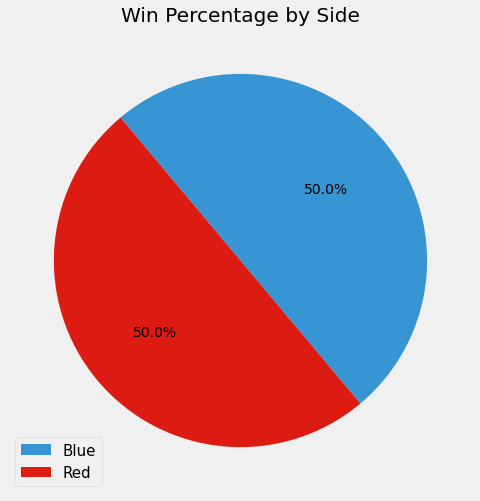

In [23]:
plt.figure(figsize = (10,8))
labels = ['Blue', 'Red']
sizes = [dtc['blueWins'].mean(), dtc['redWins'].mean()]
colors = ['#3895D3', '#DC1C13']

plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=310)
plt.title("Win Percentage by Side")
plt.legend(labels=labels, loc=3,prop={'size': 15})
plt.show()

**SHORT ANALYSIS :**

* **Kedua tim memiliki persentase kemenangan yang sama yaitu sama-sama memiliki persentase 50%.**

* **Saya ingin menganalisis lebih lanjut, untuk meraih kemenangan dalam permainan LoL, dibutuhkan suatu hal yang dinamakan Objective, Tujuan (objective) pada kebanyakan peta League adalah menghancurkan markas musuh (yang dinamakan "Nexus" di game ini).**

* **Disini saya berasumsi Objective yang diutamakan adalah menghancurkan Tower untuk mencapai Nexus dan menghancurkan Inhibitor membuat inhibitor tim memproduksi super minion yang memudahkan untuk melakukan straight push turret.**

* **Menghancurkan turret dan inhibitor (sejenis barak) akan melemahkan pertahanan tim musuh, yang memudahkan Anda untuk mengakses dan menghancurkan Nexus musuh. Memburu champion musuh memang terlihat berguna bagi tim (dan memang benar pada beberapa kasus), tetapi tujuan utamanya di saat awal adalah menghancurkan struktur musuh sebanyak-banyaknya.**

**Step berikutnya melihat persentase yang saya asumsikan sebagai Objective tim yaitu Tower Kills dan Inhibitor Kills.**

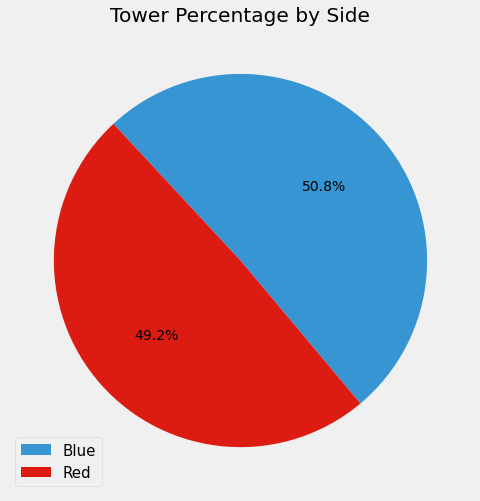

In [24]:
plt.figure(figsize = (10,8))
labels = ['Blue', 'Red']
sizes = [dtc['blueTowerKills'].mean(), dtc['redTowerKills'].mean()]
colors = ['#3895D3', '#DC1C13']

plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=310)
plt.title("Tower Percentage by Side")
plt.legend(labels=labels, loc=3,prop={'size': 15})
plt.show()

**Untuk Tower tim biru lebih objective dari pada tim merah**

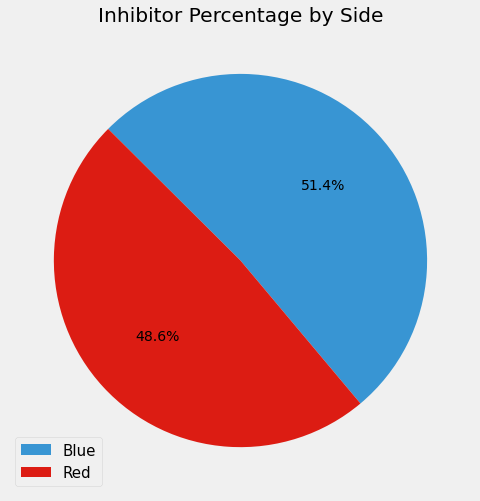

In [25]:
plt.figure(figsize = (10,8))
labels = ['Blue', 'Red']
sizes = [dtc['blueInhibitorKills'].mean(), dtc['redInhibitorKills'].mean()]
colors = ['#3895D3', '#DC1C13']

plt.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=310)
plt.title("Inhibitor Percentage by Side")
plt.legend(labels=labels, loc=3,prop={'size': 15})
plt.show()

**Sama halnya dengan Inhibitor, Tim biru lebih Objective, jadi untuk kesimpulan untuk kemenangan tim biru bisa dibilang lebih unggul karena dilihat dari segi objective.**

**Average game length**

Average game length: 24.14 minutes


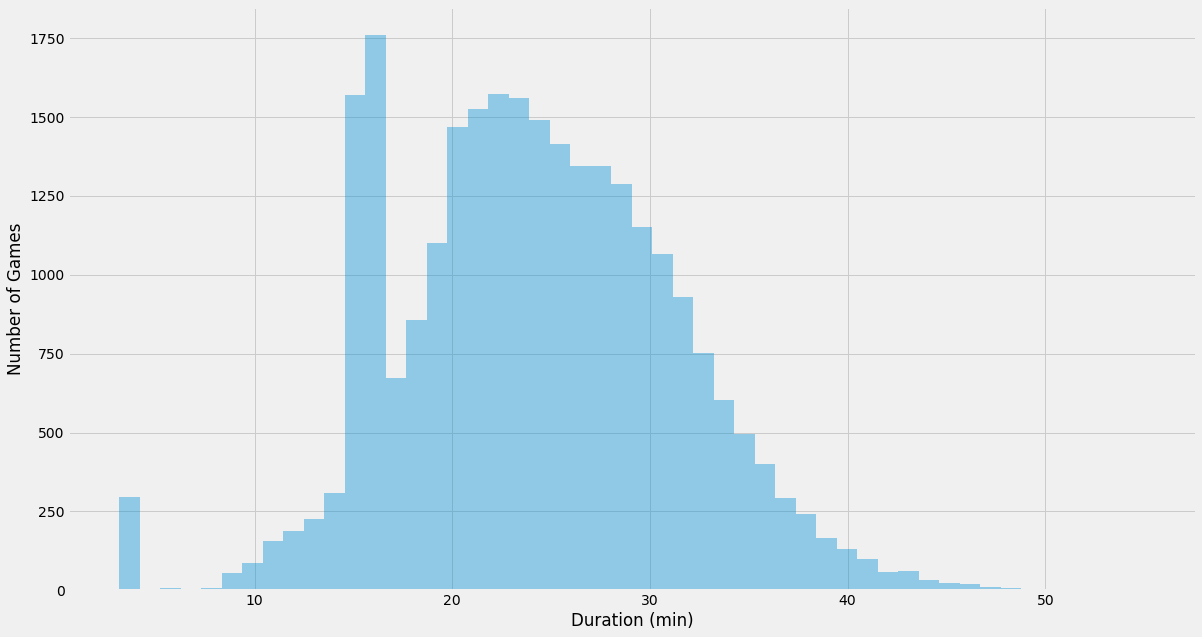

In [26]:
print("Average game length: {:.2f} minutes".format(dtc['gameDuration'].mean()/60))
plt.figure(figsize=(18,10))
sns.distplot(dtc['gameDuration']/60, hist=True, kde=False)
sns.set(font_scale = 2)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')

plt.show()

**Berdasarkan perhitungan statistik, rata-rata waktu permainan adalah 24.14 menit. untuk permainan Multiplayer online battle arena (MOBA) waktu tersebut sudah sangat umum.**

**Untuk yang kurang dari 10 menit biasanya adalah invalid match yang terjadi karena salah satu player dari tim ada yang AFK.**

**Untuk rentang waktu 12-18 menit bisa disebut mid game dan untuk rentang waktu 30-45 menit biasanya disebut dengan hard game / late game, yang disebabkan karena adanya epic comeback atau tim yang sudah unggul di mid game tiba-tiba mengalami blunder dan tim lawan memanfaatkan celah itu untuk meraih kemenangan.**

###**BLUE vs RED SIDE**

In [27]:
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

blue_percentage_data = {}

for category in categories:
    blue_total = dtc['blue'+category].sum()
    red_total = dtc['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent

blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5)>0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}

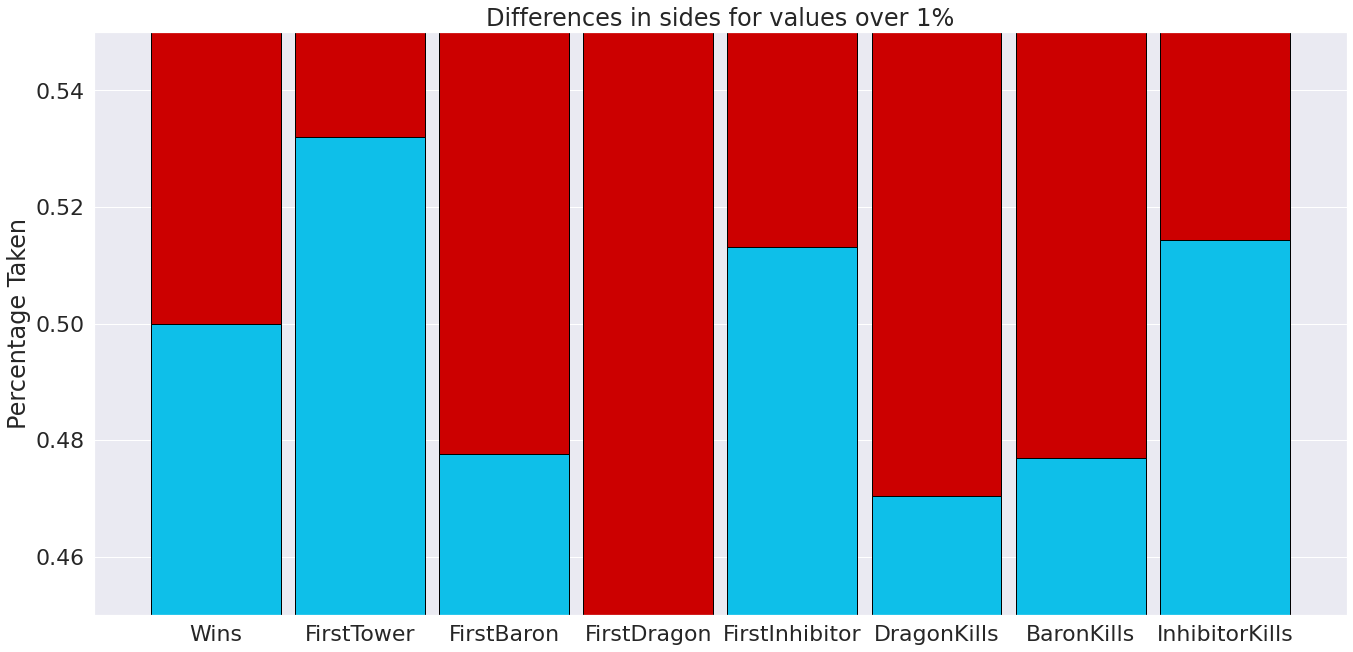

In [28]:
y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9

# blue
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)

# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylim((0.45,0.55))
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")

# Show graphic
plt.show()

**Disini saya membuat analisa lebih jauh lagi dan menambahkan beberapa objectivitas selain Tower dan Inhibitor yaitum Baron dan Dragon.**

**Bisa dilihat untuk objectivitas tambahan ternyata tim merah lebih unggul dari pada tim biru, karena tim merah unggul dalam objective baron dan dragon sedangkan tim biru hanya unggul Tower dan Inhibitor. Dari perbandingan ini mungkin dapat disimpulkan mengapa persentase kemenangan antara kedua tim sama yaitu 50% karena keduanya memiliki sisi keunggulan objectivitas masing-masing yang sama pentingnya untuk meraih kemenangan.**

### **WINNING CORRELATION**

**Melihat kolom yang sangat berkorelasi dengan kolom Wins**

In [29]:
blue_corr = dtc.corr()['blueWins'].sort_values(axis=0, ascending=False) 
red_corr = dtc.corr()['redWins'].sort_values(axis=0, ascending=False) 

In [30]:
blue_corr.head(24)

blueWins                  1.00000
blueTowerKills            0.70869
blueFirstInhibitor        0.63759
blueInhibitorKills        0.55439
blueObjectDamageDealt     0.52552
blueDragonKills           0.46674
blueKills                 0.45391
redDeath                  0.45192
blueFirstTower            0.44935
blueKillingSpree          0.42099
blueAssist                0.37365
blueFirstBaron            0.36714
blueBaronKills            0.35550
blueTotalGold             0.27659
blueFirstDragon           0.26768
blueAvgLevel              0.22631
blueTotalLevel            0.22631
blueTotalHeal             0.21562
blueJungleMinionKills     0.20807
blueFirstBlood            0.20665
blueChampionDamageDealt   0.18020
blueTotalMinionKills      0.07915
blueWardkills             0.07072
blueWardPlaced            0.03775
Name: blueWins, dtype: float64

In [31]:
red_corr.head(24)

redWins                  1.00000
redTowerKills            0.70928
redFirstInhibitor        0.62317
redObjectDamageDealt     0.54834
redInhibitorKills        0.54765
redDragonKills           0.46768
redFirstTower            0.44696
redKills                 0.44254
blueDeath                0.44052
redKillingSpree          0.41207
redFirstBaron            0.39423
redBaronKills            0.38122
redAssist                0.35680
redTotalGold             0.27098
redFirstDragon           0.26781
redJungleMinionKills     0.23131
redTotalHeal             0.22213
redTotalLevel            0.21554
redAvgLevel              0.21554
redFirstBlood            0.20755
redChampionDamageDealt   0.17402
redWardkills             0.08753
redTotalMinionKills      0.08302
redWardPlaced            0.05002
Name: redWins, dtype: float64

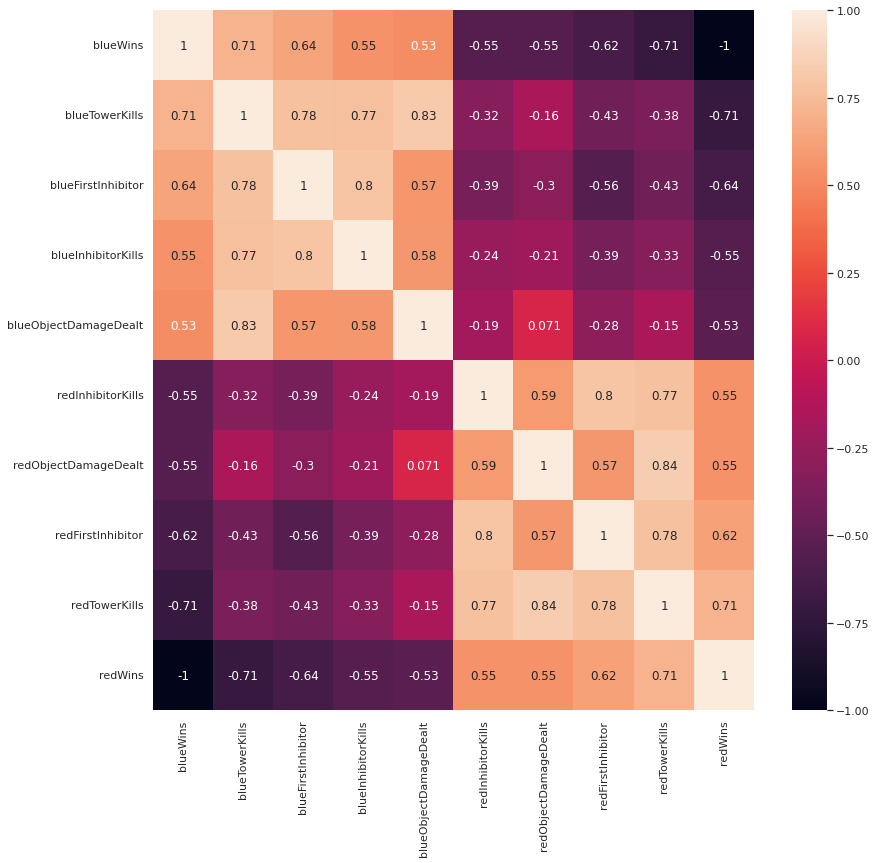

In [32]:
# get correlations of 0.5 or more
corr_cols = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.5]
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(data[corr_cols].corr(), annot=True)

**Seperti asumsi saya pada common section hal utama yang membuat suatu tim mendapatkan kemenangan adalah memprioritaskan objective Tower dan Inhibitor. Jadi untuk kolom yang memiliki nilai korelasi paling tinngi dengan kolom Wins adalah**

* **Tower Kills**
* **First  Inhibitor Kills**
* **Inhibitor Kills**
* **Objective Damage Dealt**



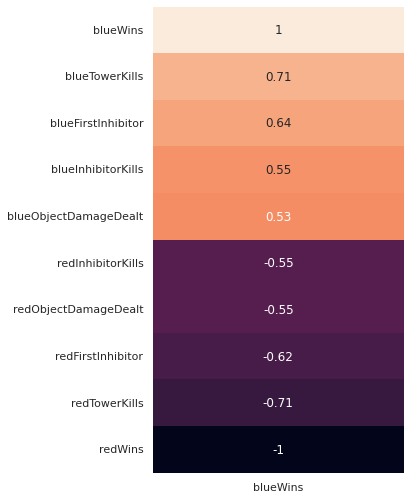

In [33]:
# Blue wins to any correlation above 0.5
plt.figure(figsize=(4,8))
sns.heatmap(blue_corr[corr_cols].to_frame(), annot=True, cbar=False)

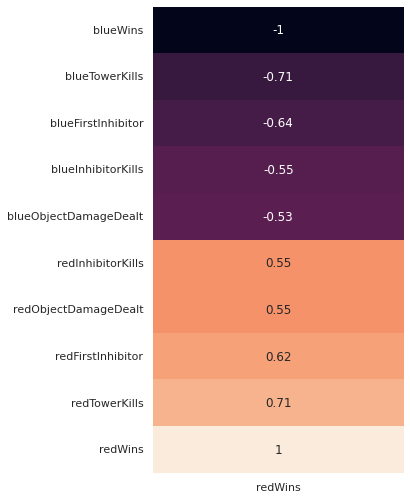

In [34]:
# Red wins to any correlation above 0.5
plt.figure(figsize=(4,8))
sns.heatmap(red_corr[corr_cols].to_frame(), annot=True, cbar=False)

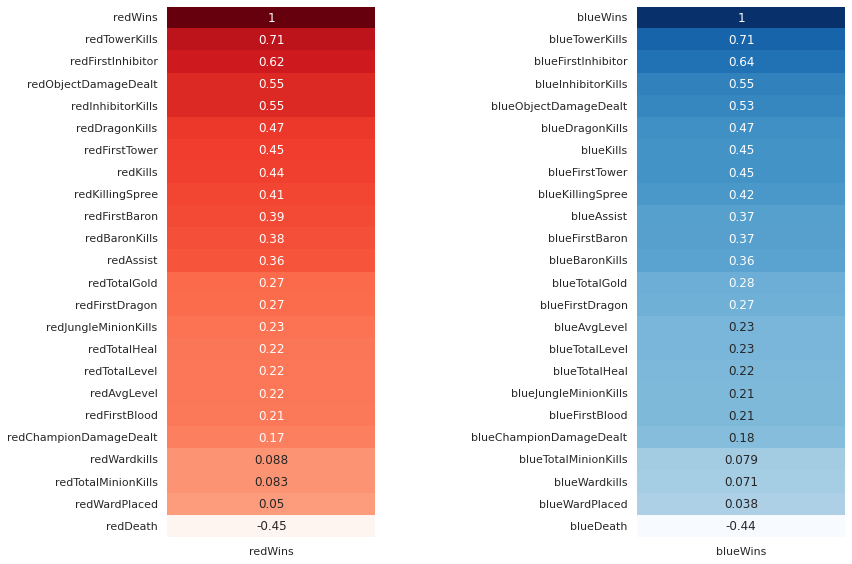

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

In [35]:
f, axes = plt.subplots(1, 2, figsize=(12, 8))

plt.figure(figsize=(4,8))
red_corra = [prop for prop,corr in blue_corr.iteritems() if 'red' in prop]
sns.heatmap(red_corr[red_corra].sort_values(axis=0, ascending=False).to_frame(), annot=True, cbar=False, ax=axes[0], cmap='Reds')

plt.figure(figsize=(4,8))
blue_corra = [prop for prop,corr in blue_corr.iteritems() if 'blue' in prop]
sns.heatmap(blue_corr[blue_corra].to_frame(), annot=True, cbar=False, ax=axes[1], cmap='Blues')

f.tight_layout(w_pad=8)

plt.show()

**Proporsi keduanya terlihat Balance. Keduanya memiliki porsi yang sama. Dan seperti objective permainan ini adalah menghancurkan Nexus. Untuk mencapai Nexus maka hal yang harus diincar adalah banyaknya turret (tower) yang berhasil dihancurkan, kemudian untuk mempermudah melakukan straight push tower maka dibutuhkan menghancurkan Inhibitor (sejenis barak) akan melemahkan pertahanan tim musuh, yang memudahkan Anda untuk mengakses dan menghancurkan Nexus musuh.**

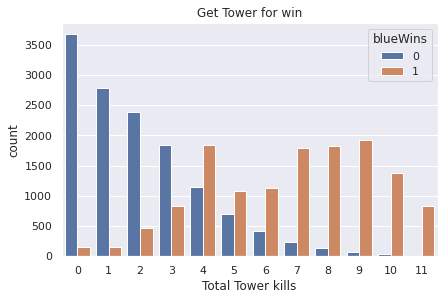

In [36]:
sns.countplot(x=dtc['blueTowerKills'], hue=dtc['blueWins'], data=dtc)
plt.title('Get Tower for win')
plt.xlabel('Total Tower kills')
plt.show()

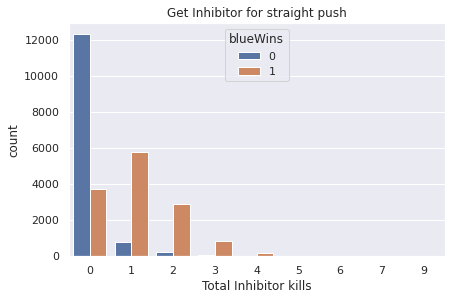

In [37]:
sns.countplot(x=dtc['blueInhibitorKills'], hue=dtc['blueWins'], data=dtc)
plt.title('Get Inhibitor for straight push')
plt.xlabel('Total Inhibitor kills')
plt.show()

**Pada dataset ini saya akan berfokus pada kemenangan Tim Biru, jadi saya akan drop semua kolom Tim Merah. Disini saya memilih untuk menganalisa data Tim Biru lebih jauh karena Tim Biru memenuhi aspek utama Objective dalam meraih kemenangan**

In [38]:
dtp =  dtc.drop(list(dtc.filter(regex='red')), axis=1)
dtp.head(10)

,gameID,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.20000,105,4,31035,5675
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.60000,111,3,26397,45303
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.40000,64,0,6567,5651
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.00000,226,3,24718,31019
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.60000,252,5,37161,95287
5,4241394461,1567,1,1,1,0,0,1,2,0,8,1,65,23,26,18,43,59839,52221,576,66,13.20000,171,9,40925,51855
6,4233222221,1686,0,0,1,0,0,0,0,0,2,0,72,26,16,31,30,70270,47107,601,65,13.00000,136,5,20503,31788
7,4233113995,1588,1,1,1,1,0,1,2,1,10,2,79,39,36,20,88,102449,59163,613,71,14.20000,157,7,28612,67404
8,4231100932,1618,1,1,1,1,0,1,3,1,8,1,89,57,26,25,44,77245,57940,704,71,14.20000,144,5,29726,66468
9,4229230455,1126,1,0,1,0,1,0,1,0,4,0,43,20,20,11,34,56652,39014,486,57,11.40000,115,5,17630,37483


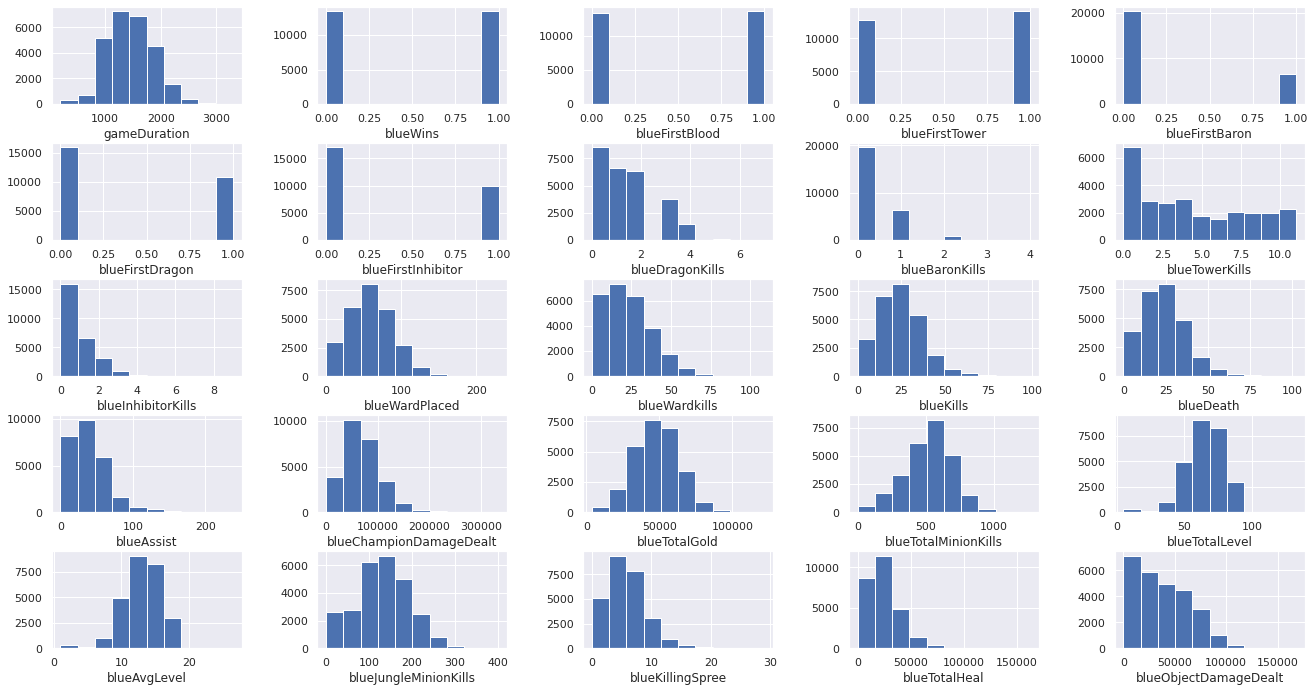

In [39]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(dtp.columns)):
    ax = fig.add_subplot(8, 5, i)
    ax.hist(dtp[dtp.columns[i]])
    plt.xlabel(dtp.columns[i])

**Sebagian besar data terdistribusi normal, walaupun ada beberapa data yang skewed.**

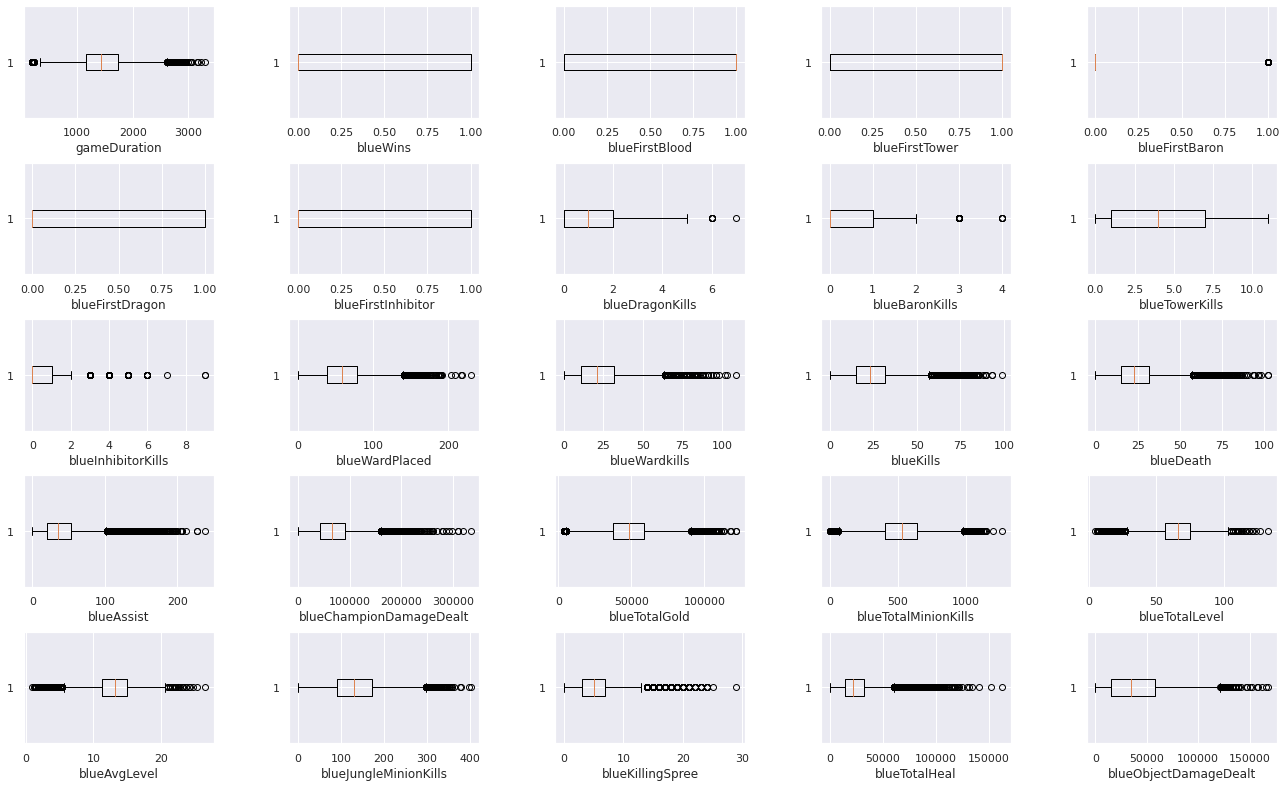

In [40]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(dtp.columns)):
    ax = fig.add_subplot(7, 5, i)
    ax.boxplot(dtp[dtp.columns[i]], vert=False)
    plt.xlabel(dtp.columns[i])

**Hasil boxplot menunjukkan ada kolom-kolom yang memiliki outlier.**

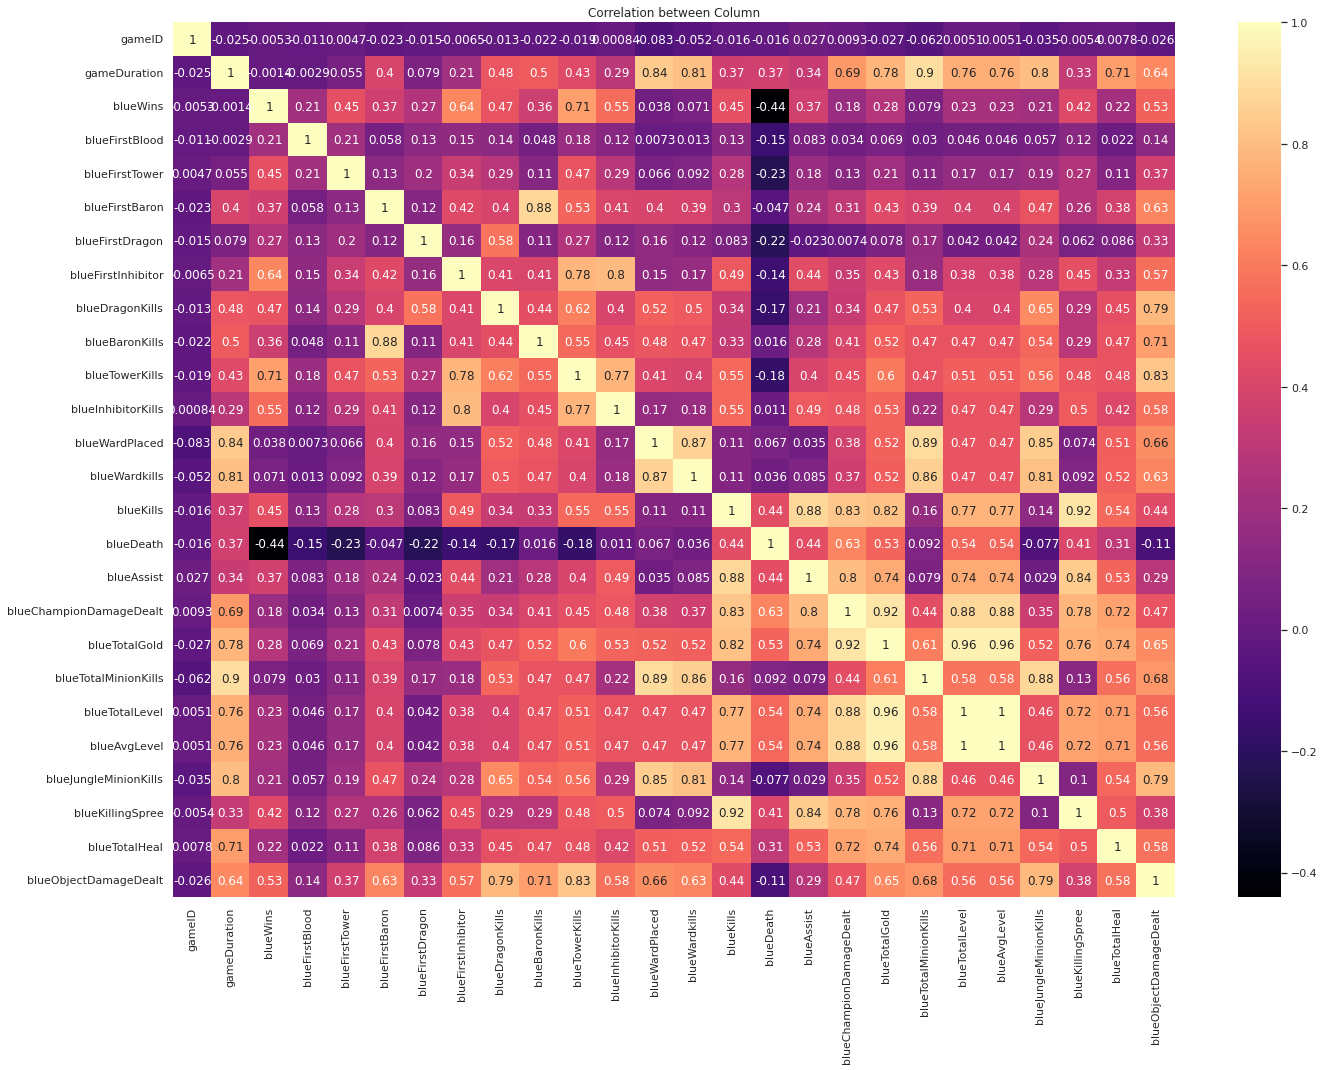

In [41]:
dtp_corr = dtp.corr()

plt.figure(figsize = (20, 15))
sns.heatmap(dtp_corr, cmap='magma', annot=True)
            
plt.title("Correlation between Column")
plt.show()

## **STEP 7 : DATA PREPROCESSING**

### **OUTLIER**

In [42]:
irq_score = {}
cols = list(dtp.columns)

for c in cols:
    q1 = dtp[c].quantile(0.25)
    q3 = dtp[c].quantile(0.75)
    score = q3 - q1
    outliers = dtp[(dtp[c] < q1 - 1.5 * score) | (dtp[c] > q3 + 1.5 * score)][c]
    values = dtp[(dtp[c] >= q1 - 1.5 * score) | (dtp[c] <= q3 + 1.5 * score)][c]
    
    irq_score[c] = {
    
        "IQR": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

,IQR,n_outliers,outliers_avg,outliers_stdev,outliers_median,values_avg:,values_stdev,values_median
gameID,77257589.00000,1034,3926999126.17408,128582773.57681,3974668518.50000,4171908182.44327,74847647.95777,4190649520.50000
gameDuration,585.25000,400,870.35500,1136.35885,195.00000,1448.64079,422.58053,1435.00000
blueWins,1.00000,0,nan,nan,nan,0.49996,0.50001,0.00000
blueFirstBlood,1.00000,0,nan,nan,nan,0.50354,0.50000,1.00000
blueFirstTower,1.00000,0,nan,nan,nan,0.52581,0.49934,1.00000
blueFirstBaron,0.00000,6551,1.00000,0.00000,1.00000,0.24400,0.42950,0.00000
blueFirstDragon,1.00000,0,nan,nan,nan,0.40640,0.49117,0.00000
blueFirstInhibitor,1.00000,0,nan,nan,nan,0.36703,0.48200,0.00000
blueDragonKills,2.00000,6,6.16667,0.40825,6.00000,1.38997,1.24723,1.00000
blueBaronKills,1.00000,54,3.07407,0.26435,3.00000,0.30699,0.53714,0.00000


**Outlier yang terdeteksi akan di drop agar prediksi model lebih optimal. Kolom gameId, gameDuration dan blueDeath akan di drop nantinya jadi outlier akan dibiarkan saja untuk kedua kolom ini.**

In [43]:
dtp = dtp.drop(columns = ['gameID','gameDuration','blueDeath'])

In [44]:
dtp.head(10)

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,0,1,0,0,0,0,0,0,0,0,38,13,15,22,56039,37001,440,56,11.20000,105,4,31035,5675
1,1,0,0,0,1,0,2,0,4,0,57,18,19,31,60243,41072,531,63,12.60000,111,3,26397,45303
2,0,0,0,0,0,0,0,0,0,0,28,7,5,8,24014,22929,306,42,8.40000,64,0,6567,5651
3,0,0,0,1,1,0,1,1,2,0,129,39,26,45,101607,63447,774,80,16.00000,226,3,24718,31019
4,1,1,1,1,1,1,2,2,11,3,114,35,27,47,134826,74955,831,83,16.60000,252,5,37161,95287
5,1,1,1,0,0,1,2,0,8,1,65,23,26,43,59839,52221,576,66,13.20000,171,9,40925,51855
6,0,0,1,0,0,0,0,0,2,0,72,26,16,30,70270,47107,601,65,13.00000,136,5,20503,31788
7,1,1,1,1,0,1,2,1,10,2,79,39,36,88,102449,59163,613,71,14.20000,157,7,28612,67404
8,1,1,1,1,0,1,3,1,8,1,89,57,26,44,77245,57940,704,71,14.20000,144,5,29726,66468
9,1,0,1,0,1,0,1,0,4,0,43,20,20,34,56652,39014,486,57,11.40000,115,5,17630,37483


**Namun tidak semua outlier bisa saya drop karena akan mengurangi banyak rows dari dataset. Sehingga saya hanya akan menghapus outlier di kolom blueKills dengan asumsi jumlah kill diatas Q3(75%) adalah very late game atau game dengan durasi diatas 35 menit. untuk ukuran Pro Player ini adalah durasi permainan yang terlalu lama.**

In [45]:
max_blueKills = dtp["blueKills"].quantile(0.75)
min_blueKills = dtp["blueKills"].quantile(0.25)

dtpF = dtp[(dtp["blueKills"] < max_blueKills) & (dtp["blueKills"] > min_blueKills)]

In [46]:
dtpF.shape

(12796, 23)

### **FEATURE SELECTION**

In [47]:
dtpF = dtpF.drop(list(dtpF)[9:], axis=1)
dtpF.head()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills
1,1,0,0,0,1,0,2,0,4
3,0,0,0,1,1,0,1,1,2
4,1,1,1,1,1,1,2,2,11
5,1,1,1,0,0,1,2,0,8
6,0,0,1,0,0,0,0,0,2


In [48]:
X = dtpF.drop(columns = ["blueWins"])
y = dtpF["blueWins"]

In [49]:
X.shape

(12796, 8)

In [50]:
y.shape

(12796,)

### **SPLIT DATASET**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 77)

### **SCALLING**

In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [53]:
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

## **STEP 8 : DEFINE MODEL AND TRAINING**

In [54]:
# Evaluate function

def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINING RESULTS :")
    print("="*75)
    model_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX  :\n{confusion_matrix(y_train, y_train_pred)}\n")
    print(f"ACCURACY SCORE    : {accuracy_score(y_train, y_train_pred):.4f}\n")
    print(f"F1 SCORE          : {f1_score(y_train, y_train_pred)}\n")
    print(f"ROC_AUC SCORE     : {roc_auc_score(y_train, y_train_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n\n{model_report}\n\n")

    print("TESTING RESULTS :")
    print("="*75)
    model_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX  :\n{confusion_matrix(y_test, y_test_pred)}\n")
    print(f"ACCURACY SCORE    : {accuracy_score(y_test, y_test_pred):.4f}\n")
    print(f"F1 SCORE          : {f1_score(y_test, y_test_pred)}\n")
    print(f"ROC_AUC SCORE     : {roc_auc_score(y_test, y_test_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n\n{model_report}\n\n")

### **LOGISTIC REGRESSION**

In [55]:
tstart = time.time() #for calculating processing time

C = [0.1, 0.5, 1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
verbose = [1, 2, 3]

params_grid = {'C': C,
               'solver': solver,
               'verbose': verbose}

model_log = LogisticRegression(random_state=77)
model_log_gridCV = GridSearchCV(model_log, params_grid, cv=5, verbose=2, n_jobs=-1)

model_log_gridCV.fit(X_train_trf, y_train)
best_params = model_log_gridCV.best_params_
print(f"Best parameters: {best_params}")


tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_log_best = LogisticRegression(**best_params)
model_log_best.fit(X_train_trf, y_train)

evaluate(model_log_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Best parameters: {'C': 0.1, 'solver': 'newton-cg', 'verbose': 1}
Elapsed prediction time:  7917.05  ms
TRAINING RESULTS :
CONFUSION MATRIX  :
[[2991  810]
 [ 780 4376]]

ACCURACY SCORE    : 0.8225

F1 SCORE          : 0.8462579771804294

ROC_AUC SCORE     : 0.8178090613123123

CLASSIFICATION REPORT:

                   0          1  accuracy  macro avg  weighted avg
precision    0.79316    0.84381   0.82249    0.81848       0.82232
recall       0.78690    0.84872   0.82249    0.81781       0.82249
f1-score     0.79002    0.84626   0.82249    0.81814       0.82239
support   3801.00000 5156.00000   0.82249 8957.00000    8957.00000


TESTING RESULTS :
CONFUSION MATRIX  :
[[1270  342]
 [ 340 1887]]

ACCURACY SCORE    : 0.8223

F1 SCORE          : 0.846947935368043

ROC_AUC SCORE     : 0.8175847176709033

CLASSIFICATION REPORT:

                   0          1  accuracy  macro avg  weighted avg
precision    0.78882    0.84657   0.82235    0.81769       0.82232
recall       0.78784    0.8473

### **RANDOM FOREST**

In [56]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 200, 300]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
criterion = ['gini','entropy']

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'criterion': criterion}

model_rf = RandomForestClassifier(random_state=77)
model_rf_gridCV = GridSearchCV(model_rf, params_grid, cv=5, verbose=2, n_jobs=-1)


model_rf_gridCV.fit(X_train_trf, y_train)
best_params = model_rf_gridCV.best_params_
print(f"Best parameters: {best_params}")

tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_rf_best = RandomForestClassifier(**best_params)
model_rf_best.fit(X_train_trf, y_train)

evaluate(model_rf_best, X_train_trf, y_train, X_test_trf, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Elapsed prediction time:  83454.39  ms
TRAINING RESULTS :
CONFUSION MATRIX  :
[[2933  868]
 [ 646 4510]]

ACCURACY SCORE    : 0.8310

F1 SCORE          : 0.8562749193089045

ROC_AUC SCORE     : 0.823174059580499

CLASSIFICATION REPORT:

                   0          1  accuracy  macro avg  weighted avg
precision    0.81950    0.83860   0.83097    0.82905       0.83050
recall       0.77164    0.87471   0.83097    0.82317       0.83097
f1-score     0.79485    0.85627   0.83097    0.82556       0.83021
support   3801.00000 5156.00000   0.83097 8957.00000    8957.00000


TESTING RESULTS :
CONFUSION MATRIX  :
[[1245  367]
 [ 318 1909]]

ACCURACY SCORE    : 0.8216

F1 SCORE          : 0.847879191650011

ROC_AUC SCORE     : 0.8147697555714271

CLASSIFICATION REPORT:

                   0          1  accuracy  macro avg  weighted avg
precision    0.79655    0.83875   0.82157    0.81765       

**Dari hasil scoring kedua model, dapat dilihat model RandomForest merupakan model yang paling cocok untuk dataset ini. Bisa dilihat dari Testing Resultnya mendapatkan nilai yang lebih tinggi dari pada Testing Result pada Logistic Regression.**

## **STEP 9 : IMPROVEMENTS (WITH PIPELINE) AND EVALUATION**

In [57]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', RandomForestClassifier(random_state=77))])

In [58]:
param_grid = [
              
    {'classifier': [RandomForestClassifier(random_state=77)],
     'preprocessing': [MinMaxScaler(), None],
     'classifier__n_estimators': [100, 200, 300],
     'classifier__criterion': ['entropy', 'gini'],
     'classifier__max_features': ['auto', 'sqrt'],
     'classifier__max_depth': [2, 3, 5]},

    {'classifier': [LogisticRegression(random_state=77)],
     'preprocessing': [MinMaxScaler(), None],
     'classifier__C': [0.1, 0.5, 1],
     'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
     'classifier__verbose': [1, 2, 3]}
]

In [59]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1,verbose=2)
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  2.9min finished


Best params:
{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=77, verbose=0,
                       warm_start=False), 'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200, 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}

Best cross-validation score: 0.83
Test-set score: 0.82


**Hasil pemilihan "best parameter" antara RandomForest dan LogisticRegression, dimenangkan oleh Random Forest dengan Skor**

* **Best cross-validation score : 0.83**
* **Test-set score : 0.82**

### **PIPELINE EVALUATION**

In [60]:
y_test_pred = grid.predict(X_test)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}\n")
print(f"ACCURACY SCORE  : {accuracy_score(y_test, y_test_pred):.4f}\n")
print(f"F1 SCORE        : {f1_score(y_test, y_test_pred)}\n")
print(f"ROC_AUC SCORE   : {roc_auc_score(y_test, y_test_pred)}\n")
print(f"CLASSIFICATION REPORT:\n\n{classification_report(y_test, y_test_pred)}\n")

CONFUSION MATRIX:
[[1245  367]
 [ 318 1909]]

ACCURACY SCORE  : 0.8216

F1 SCORE        : 0.847879191650011

ROC_AUC SCORE   : 0.8147697555714271

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1612
           1       0.84      0.86      0.85      2227

    accuracy                           0.82      3839
   macro avg       0.82      0.81      0.82      3839
weighted avg       0.82      0.82      0.82      3839




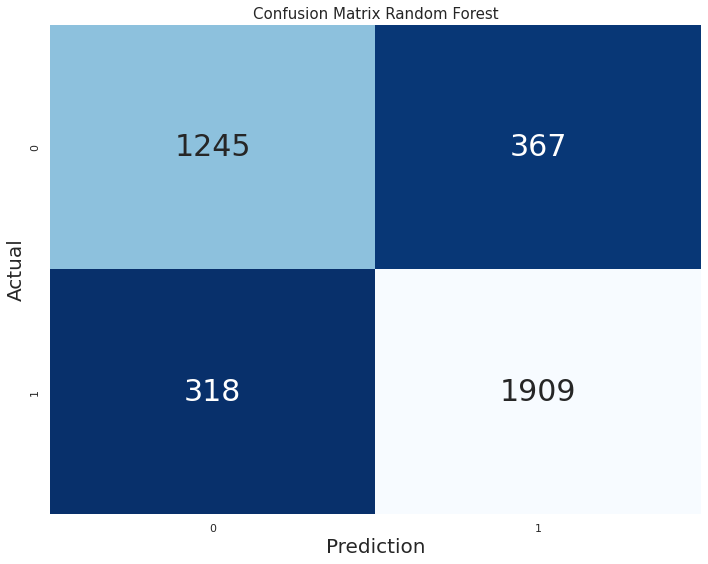

In [61]:
plt.figure(figsize = (10, 8))
sns.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot = True,
        fmt = '.0f',
        cmap = 'Blues_r', cbar=False,
        annot_kws={"fontsize":30}
    )
plt.xlabel("Prediction", fontsize = 20)
plt.ylabel("Actual", fontsize = 20)
plt.title("Confusion Matrix Random Forest", fontsize = 15)

plt.tight_layout()
plt.show()

* **True Negative  = 1245**
* **False Positive = 367**
* **False Negative = 318**
* **True Positive  = 1909**

## **STEP 10 : MODEL INFERENCE**

In [62]:
pred_result = []

model_pred = grid.predict(X_test)
pred_result.append(model_pred)

In [63]:
#insert predict result to dataframe
pred_result_log = pd.DataFrame({
    "Actual Target":y_test,
    "Prediction with RF":pred_result[0]
})
pred_result_log.head(10)

,Actual Target,Prediction with RF
18068,1,1
16834,0,0
9475,0,0
8476,1,1
26619,1,1
22502,1,1
15360,0,1
6143,1,1
1130,1,1
26882,0,1


In [64]:
pred_result_log.tail(10)

,Actual Target,Prediction with RF
9703,1,1
10542,1,1
11950,1,1
23844,1,1
9595,1,1
26555,1,1
9566,1,0
4999,0,0
18972,1,1
2356,0,0


## **STEP 11 : CONCLUSION**

### **OVERALL ANALYSIS EDA**

1. **Kedua tim memiliki persentase kemenangan yang sama yaitu sama-sama memiliki persentase 50%.**

2. **Untuk meraih kemenangan di game ini, dibutuhkan suatu hal yang dinamakan Objective, Tujuan (objective) adalah untuk menghancurkan markas musuh (yang dinamakan "Nexus" di game ini).**

3. **Asumsi Objective yang diutamakan adalah menghancurkan Tower untuk mencapai Nexus dan menghancurkan Inhibitor membuat inhibitor tim memproduksi super minion yang memudahkan untuk melakukan straight push turret untuk mencapai kemenangan.**

4. **Menghancurkan turret dan inhibitor (sejenis barak) akan melemahkan pertahanan tim musuh, yang memudahkan Tim untuk mengakses dan menghancurkan Nexus musuh. Memburu champion musuh memang terlihat berguna bagi tim (dan memang benar pada beberapa kasus), tetapi tujuan utamanya di saat awal adalah menghancurkan struktur musuh sebanyak-banyaknya untuk meraih kemenangan.**

5. **Pada dataset ini Tim biru lebih Objective dari segi Tower Kills dan Inhibitor Kills, jadi untuk kesimpulan kemenangan tim biru bisa dibilang lebih unggul karena dilihat dari segi objectivitasnya dari pada Tim Merah.**

6. **Berdasarkan perhitungan statistik, rata-rata waktu permainan adalah 24.14 menit. untuk permainan Multiplayer online battle arena (MOBA) waktu tersebut sudah sangat umum.**

7. **Disini saya membuat analisa lebih jauh lagi dan menambahkan beberapa objectivitas selain Tower dan Inhibitor yaitum Baron dan Dragon.**

8. **Untuk objectivitas tambahan ternyata tim merah lebih unggul dari pada tim biru, karena tim merah unggul dalam objective baron dan dragon sedangkan tim biru hanya unggul Tower dan Inhibitor. Dari perbandingan ini mungkin dapat disimpulkan mengapa persentase kemenangan antara kedua tim sama yaitu 50% karena keduanya memiliki sisi keunggulan objectivitas masing-masing yang sama pentingnya untuk meraih kemenangan.**

9. **Seperti asumsi saya di point Nomor 3, Hal utama yang membuat suatu tim mendapatkan kemenangan adalah memprioritaskan objective Tower dan Inhibitor. Jadi untuk kolom yang memiliki nilai korelasi paling tinngi dengan kolom Wins adalah**
 * **Tower Kills**
 * **First  Inhibitor Kills**
 * **Inhibitor Kills**
 * **Objective Damage Dealt**



### **MODEL ANALYSIS**

**Random Forest memiliki akurasi yang cukup tinggi dan Logistic Regression memiliki kecepatan yang cukup tinggi dan interpretable. Untuk pemilihan model terbaik menggunakan pipeline dan gridsearchCV (Untuk hyperparameter tuning) dan Random Forest lebih unggul dari Logistic Regression, dengan skor:**
* **ACCURACY SCORE : 0.8216**

* **F1 SCORE : 0.8478**

* **ROC_AUC SCORE : 0.8147**

**Hasil pemilihan "best parameter" antara RandomForest dan LogisticRegression, dimenangkan oleh Random Forest dengan Skor**
* **Best cross-validation score : 0.83**
* **Test-set score : 0.82**

**Untuk Confusion Matrix mendapatkan nilai :**
* **True Negative  = 1245**
* **False Positive = 367**
* **False Negative = 318**
* **True Positive  = 1909**

**Nilai yang diperhatikan pada confusion matrix adalah F1 Score nya, atau keseimbangan antara precision dan recall (false negative dan false positive). Karena model ini diharapkan dapat memprediksi dengan tepat dan akurat, sehingga tim dapat membuat strategi yang tepat mengenai objective apa yang diutamakan pada setiap match dan batasan waktu objective tersebut harus dicapai.**






## **STEP 12 : THE LAST**

**Mengambil model yang akan digunakan untuk deployment, model yang akan digunakan adalah model Random Forest**

In [65]:
import joblib
joblib.dump(grid,'RandomForest_model')

['RandomForest_model']